# Medical Cost Personal Dataset

## I am using the Medical Cost Prediction Dataset from Kaggle

### To find the variables in the dataset that directly influence medical insurance cost and how the variables are related to each other, using data visualisation techniques and linear regression

First, we must import all relevant libraries, packages and the data itself, 

The Data itself will not need an in-depth explanation as it is self-explanatory 

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

The dataset can be broken into 7 Variables:
Age, Sex, BMI(Body Mass Index), Number of Children, Smoking Status, Region and Charges

In [118]:
# data import - named data
data = pd.read_csv("insurance.csv")

# checking first 25 records
data.head(25)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Null Check

In [119]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Descriptive Statistics of Data 

In [120]:
# in built function to show statistics 
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Getting the Data Types of the Variables

In [121]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


### Encoding the Necessary Variables as Integer Values

unsure as of yet if I will be using the region variable

In [122]:
# Call the Label Enconder
le = LabelEncoder()

#Convert the 'sex' and 'smoker' columns to numerical values
data['sex']=le.fit_transform(data['sex'])

data['smoker']=le.fit_transform(data['smoker'])

# Show the Change
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB
None


### Decided on Dropping the Region Column 

In [123]:
data.drop('region', axis=1, inplace=True)

### Verifying the encoding has been a success

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


### Seeing how the encoding pertains to the dataset

Sex can now be seen as:
<br> 1 For Female
<br> 0 for Male
                        
Smoker can be seen as:
<br> 1 Positive Smoking Status
<br> 0 Negative Smoking Status


In [125]:
data.head(25)

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
5,31,0,25.740,0,0,3756.62160
6,46,0,33.440,1,0,8240.58960
7,37,0,27.740,3,0,7281.50560
8,37,1,29.830,2,0,6406.41070
9,60,0,25.840,0,0,28923.13692


-----------------------------------------------------------------------------------------------------------------                         

### Check Correlation Values, 

numbers closer to 1 indicate a strong correlation

We will then plot the correlation for data visualisation

In [126]:
data.corr()['charges'].sort_values()

sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

Original thoughts when looking at dataset were that Age and BMI (Body Mass Index) would play a larger role in insurance charges, this is obviously proved wrong when looking at this dataset

-----------------------------------------------------------------------------------------------------------------                         

### Visualisation of Data

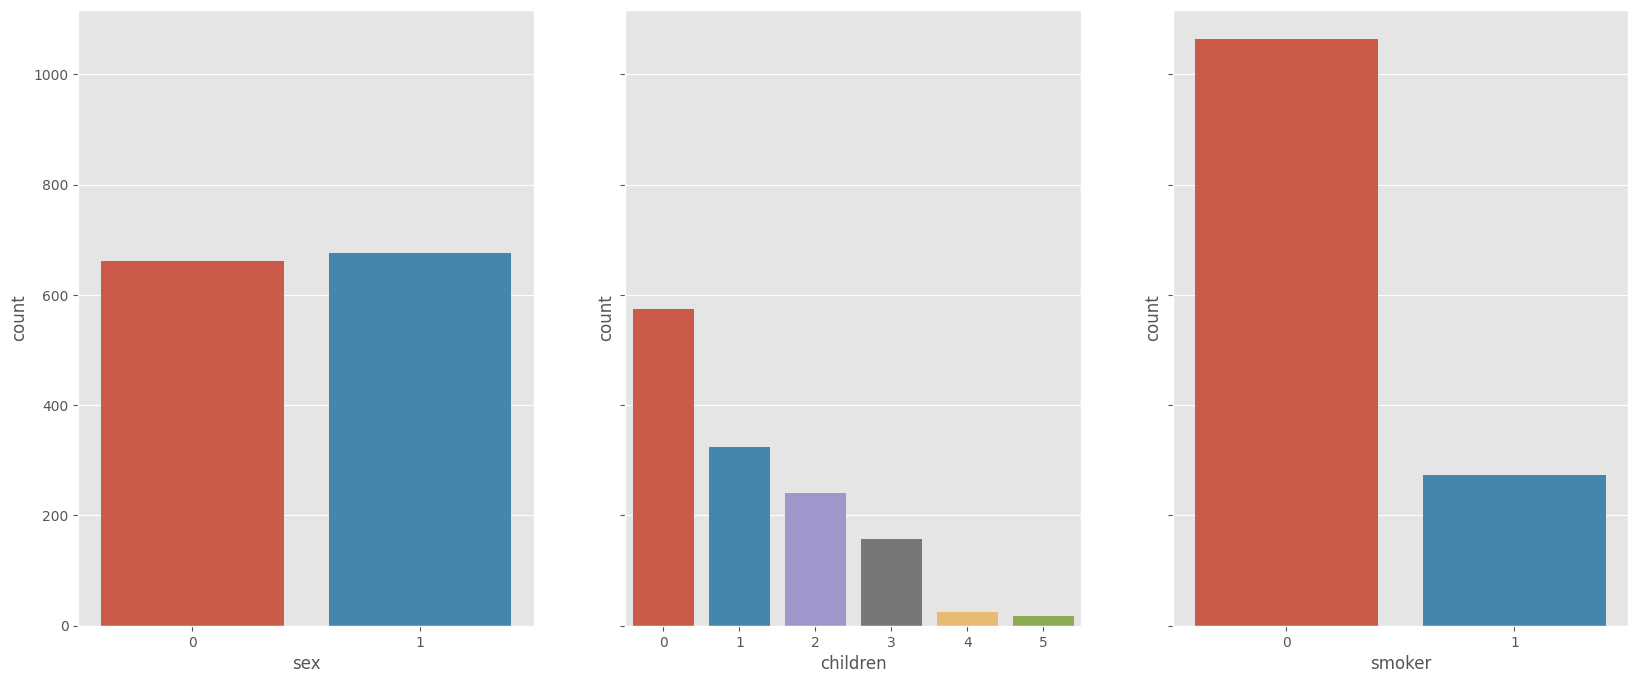

In [161]:
# Creating a grid figure with matplotlib
fig , myGrid = plt.subplots(nrows=1 , ncols=3, figsize=(20,8) , sharey=True)

# For loop applying index to columns
for index , col in enumerate(['sex' , 'children' ,'smoker']) : 
    
    #index indicates there should be 4 columns to plot
    sns.countplot(data=data , x=col , ax=myGrid[index])

### Below, we can see the correlation shown by the heatmap, visible correlation between Smokers and Charges



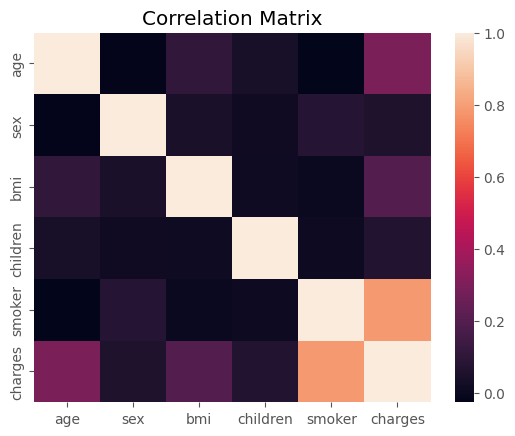

In [128]:
# title for figure
plt.title('Correlation Matrix')

# assigning the correlation to a variable
corr = data.corr()

# plotting the correlation as heatmap
sns.heatmap(corr)

#shows all open figures
plt.show()

### As shown below, the differences in charges between positive and negative smoking status and how it pertains to charges

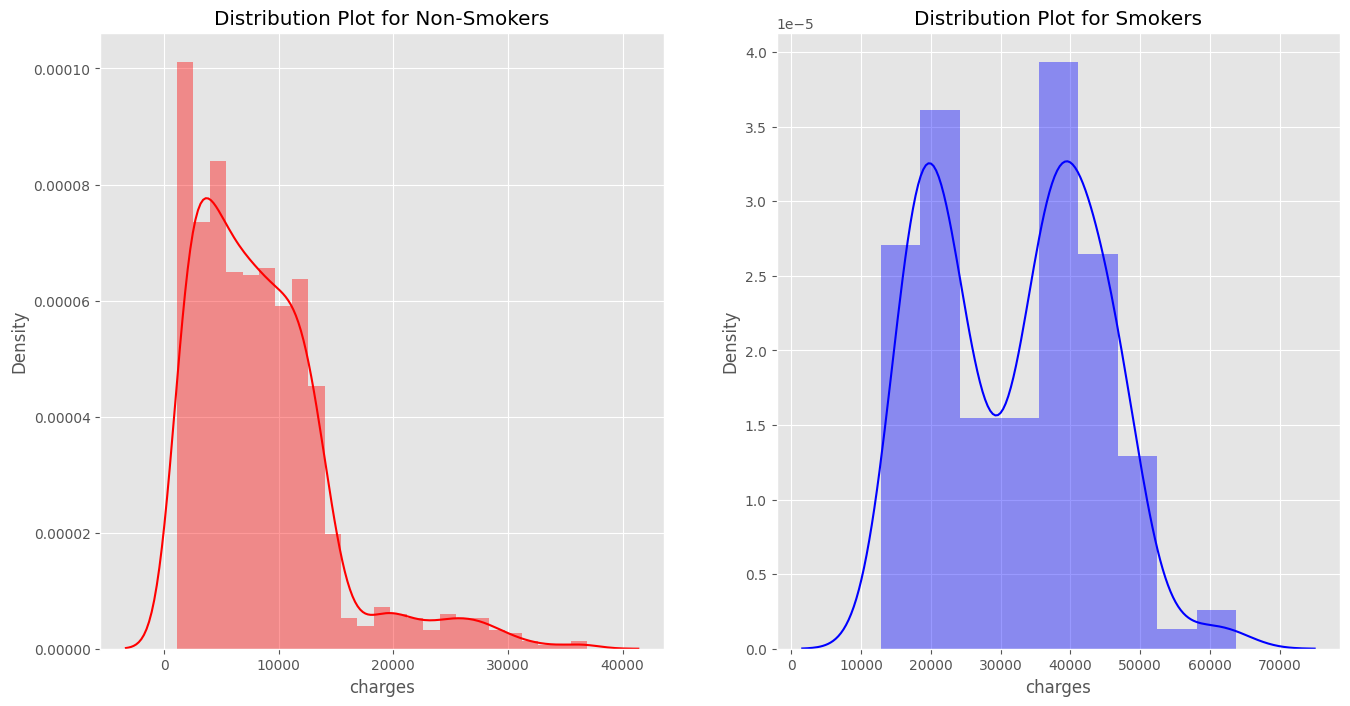

In [129]:
# Creating a grid figure with matplotlib
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# Plot 1
d1 = sns.distplot(data[(data.smoker == 0)] ['charges'] ,color='r', ax=my_grid[0])

# Title of plot 1
d1.set_title('Distribution Plot for Non-Smokers')

# Plot 2
d2 = sns.distplot(data[(data.smoker == 1)] ["charges"], color='b',ax=my_grid[1])

# Title of plot 2
d2.set_title('Distribution Plot for Smokers');

### Checking the Gender Dispersion between Smoking Statuses

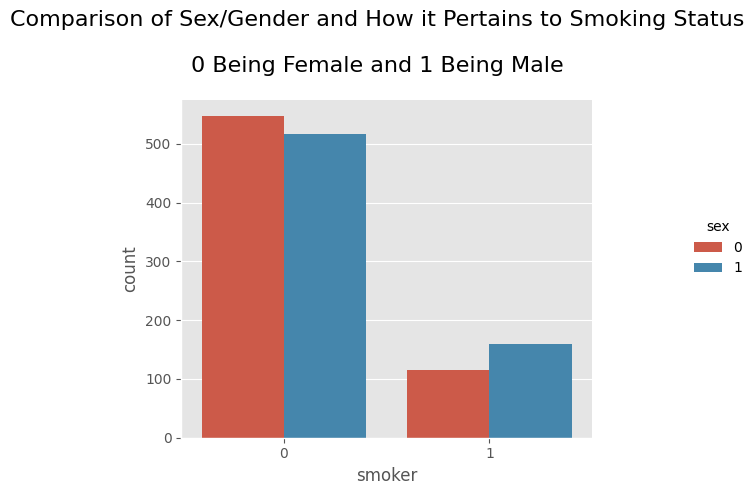

In [130]:
# use seaborn to show a catplot
cp = sns.catplot(x="smoker", kind="count", hue = 'sex', data=data, legend="false")

# adjust spacing
cp.figure.subplots_adjust(top=.8);

#add title 
cp.figure.suptitle(
    "Comparison of Sex/Gender and How it Pertains to Smoking Status\n\n" + 
    "0 Being Female and 1 Being Male",
    fontsize=16,
);

### Visualing where the charges peak with Smoking Status'

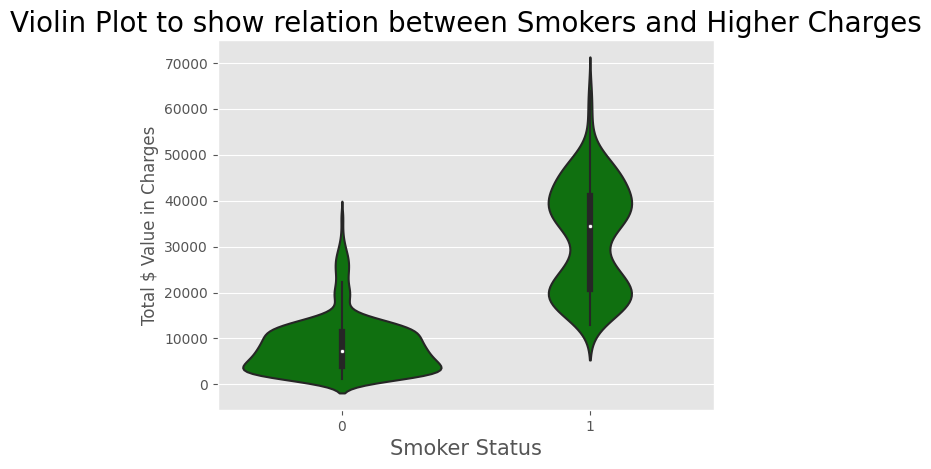

In [131]:
# using seaborn create a violin plot
vp = sns.violinplot(x = data['smoker'], y = data['charges'], color ='g')

vp.set_title('Violin Plot to show relation between Smokers and Higher Charges', fontsize = 20)

vp.set_xlabel('Smoker Status', fontsize = 15)

vp.set_ylabel('Total $ Value in Charges')

#shows open figures
plt.show()

Text(0.5, 0.98, 'The number of smokers and non-smokers less than 25')

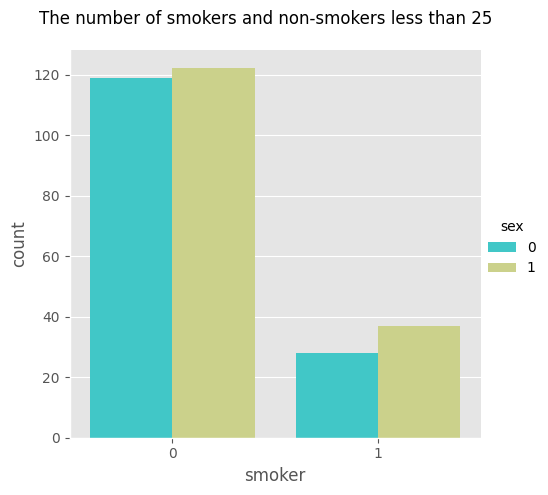

In [132]:

cp = sns.catplot(x="smoker", kind="count", hue = 'sex', palette="rainbow", data=data[(data.age <= 25)], legend="false")

cp.figure.subplots_adjust(top=0.9);

cp.figure.suptitle("The number of smokers and non-smokers less than 25")

### Plotting BMI and Visualing the Effects of Higher Body Mass to Higher Costs

"If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range." - Centers for Disease Control and Prevention

#### We can see that while the majority of distribution is between the 1000 to 30000 range, Higher BMI generally results in Higher Charges

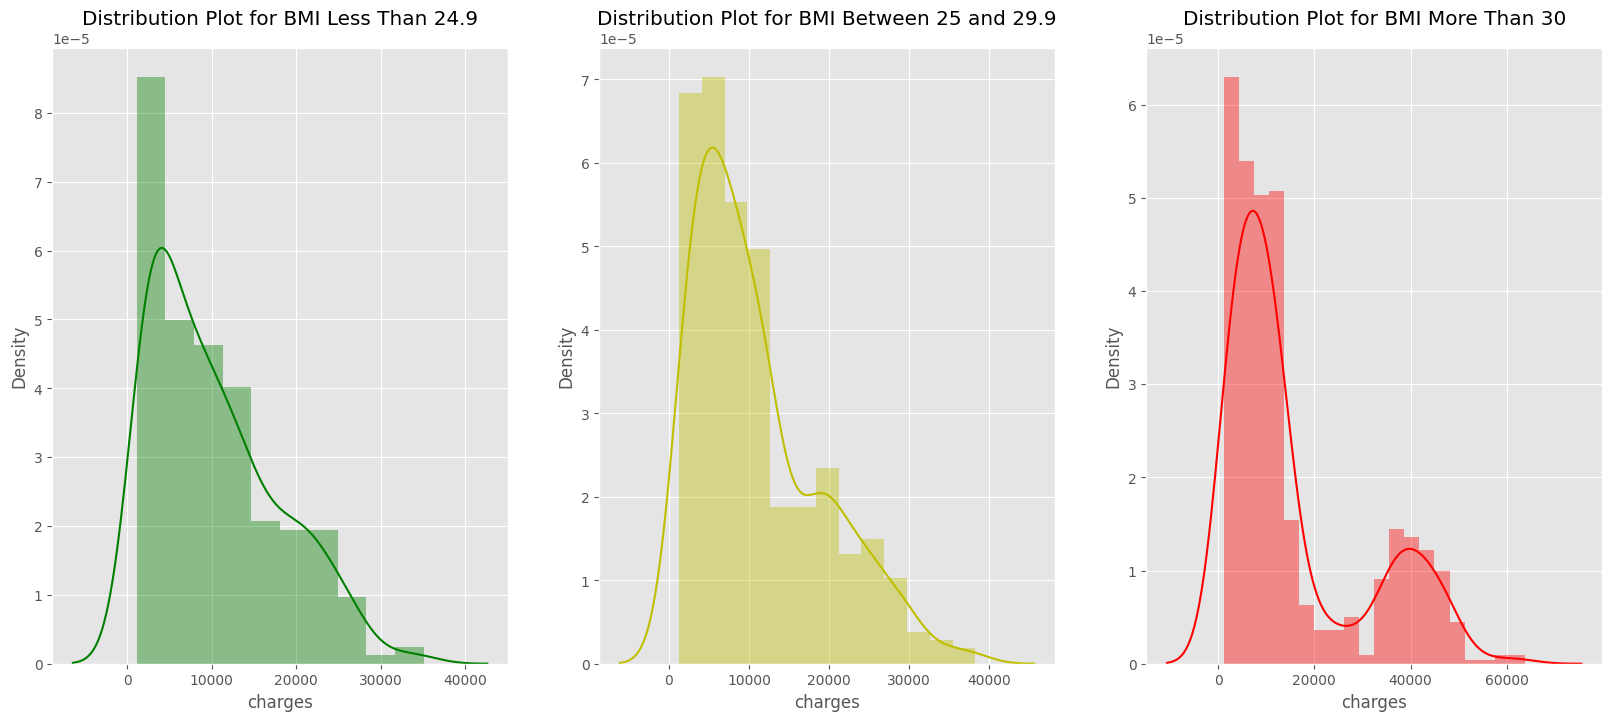

In [163]:
# Creating a grid figure with matplotlib
fig, my_grid = plt.subplots(nrows=1, ncols=3, figsize=(20,8), )

# Plot 1
d1 = sns.distplot(data[(data.bmi <= 24.9)] ['charges'] ,color='g', ax=my_grid[0])

# Title of Plot 1
d1.set_title('Distribution Plot for BMI Less Than 24.9')

# Plot 2
d2 = sns.distplot(data[ (data.bmi > 25) & (data.bmi <=29.9) ] ["charges"], color='y',ax=my_grid[1])

# Title of Plot 2
d2.set_title('Distribution Plot for BMI Between 25 and 29.9');

# Plot 3
d2 = sns.distplot(data[(data.bmi > 30)] ["charges"], color='r',ax=my_grid[2])

# Title of Plot 3
d2.set_title('Distribution Plot for BMI More Than 30');

### Plotting Age Against Charges

#### Comparing Age against Charges for People Under and Over 30 Years Old 

#### Visible increase in charges attached to Higher Ages

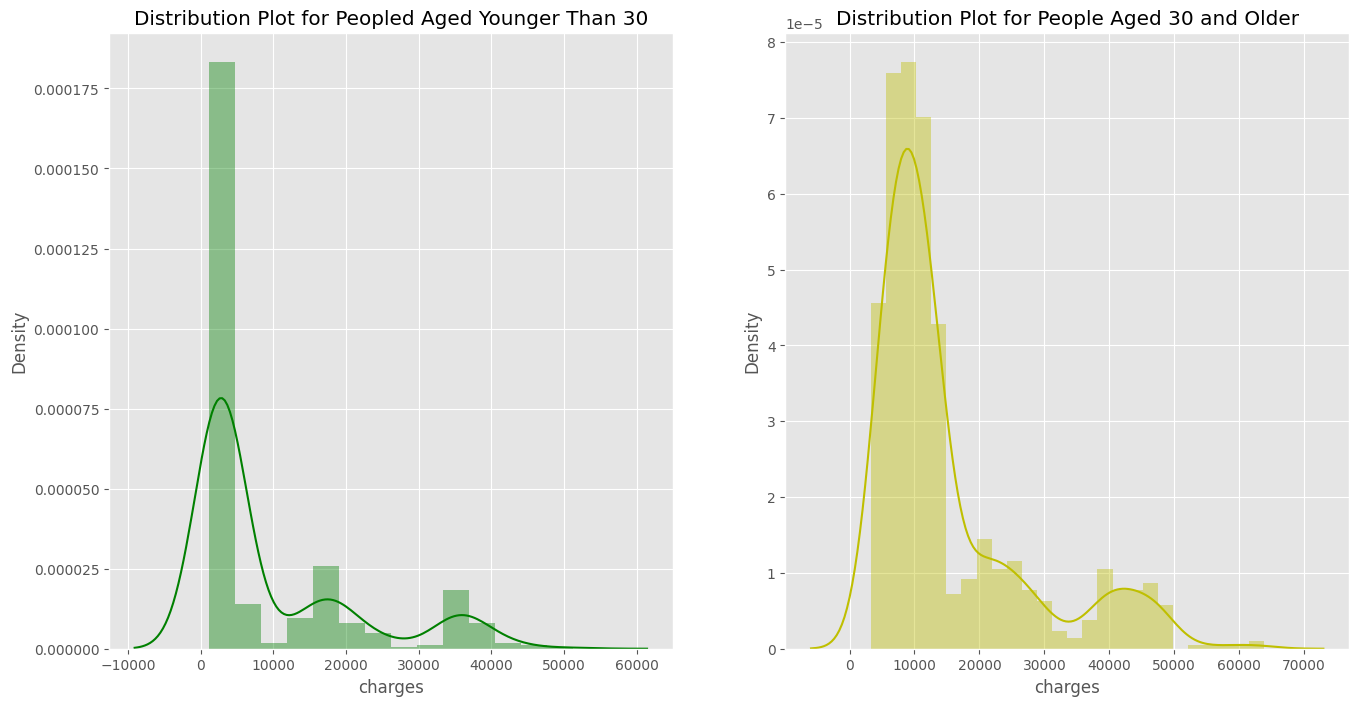

In [165]:
# Creating a grid figure with matplotlib
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# Plot 1
d1 = sns.distplot(data[(data.age <= 30)] ['charges'] ,color='g', ax=my_grid[0])

# Title of Plot 1
d1.set_title('Distribution Plot for Peopled Aged Younger Than 30')

# Plot 2
d2 = sns.distplot(data[ (data.age > 30) ] ["charges"], color='y',ax=my_grid[1])

# Title of Plot 2
d2.set_title('Distribution Plot for People Aged 30 and Older');

### Scatter Plot Visualising Body Mass Index and how Smoking Status Affects the Charges

##### We can see clearly the trend, with a high BMI (anything over 25) and a positive smoking status, the charges increase. 

Text(0.5, 1.0, 'Scatter Plot of BMI vs Charges with Smoking Status')

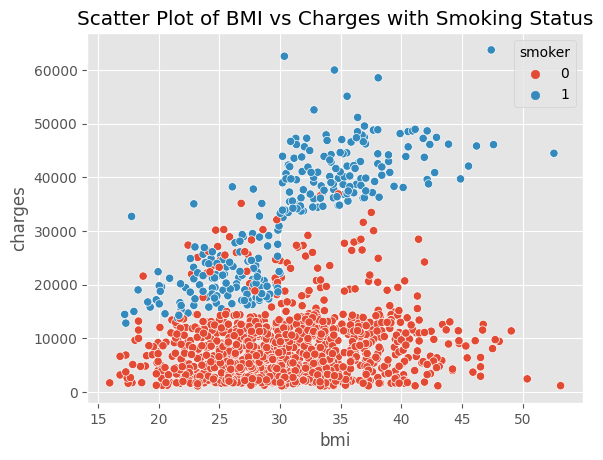

In [135]:
sp = sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker')
sp.set_title('Scatter Plot of BMI vs Charges with Smoking Status')

### Here we can see Charges Trend Upwards as Age Increases, regardless of Smoking Status

#### We can also see how smoking status can affect charges when combined with Age

Text(0.5, 1.0, 'Scatter Plot of Charges vs Age with Smoking Status')

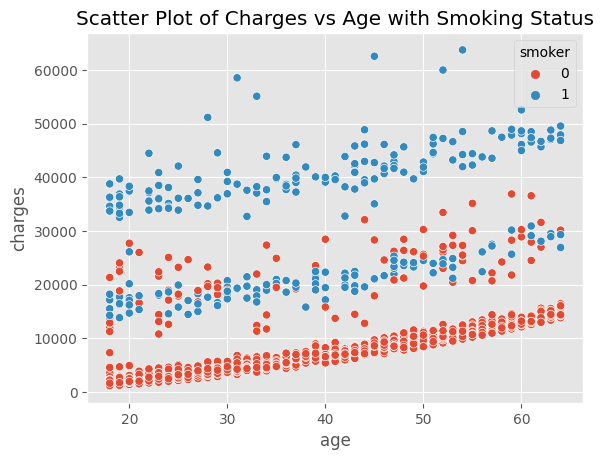

In [136]:
sc=sns.scatterplot(x='age',y='charges',data=data,hue='smoker')
sc.set_title('Scatter Plot of Charges vs Age with Smoking Status')

### Verifying Data has no Region and Column is Dropped

In [137]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB
None


### Standardising Features of the Dataset

In [138]:
columns = data.columns

scaler = StandardScaler()

scaledData = scaler.fit_transform(data)
scaledData = pd.DataFrame(scaledData, columns=columns)
scaledData.head()

,age,sex,bmi,children,smoker,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.776802


### Isolating the Independent Variables 

In [139]:
X = scaledData.drop("charges", axis=1)

print(X.info() )
print (X.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   float64
dtypes: float64(5)
memory usage: 52.4 KB
None
(1338, 5)


### Isolating the Target Variable

In [140]:
Y = scaledData['charges']

print(Y.describe() )
print(Y.shape)

count    1.338000e+03
mean    -8.098488e-17
std      1.000374e+00
min     -1.003557e+00
25%     -7.046504e-01
50%     -3.212089e-01
75%      2.783441e-01
max      4.171663e+00
Name: charges, dtype: float64
(1338,)


## Implementing Linear Regression on the Dataset

In [179]:
from sklearn.metrics import mean_squared_error


# split data into training sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30, random_state=0)

# creating object of linear regresssion class
regression = linear_model.LinearRegression()

#fitting the data on the model
regression.fit(X_train, Y_train) 


print ("\n\nModel Evaluation:\n")

#R-Squared

print("R-Squared: %.3f"
      % regression.score(X_test,Y_test))  

#MSE

Y_pred = regression.predict(X_test) 
print("Mean Squared Error: %.3f"
      % mean_squared_error(Y_test, Y_pred))  

#MAE

print("Mean Absolute Error: %.3f"
      % mean_absolute_error(Y_test, Y_pred))

print("\nThe intercept / beta_0 is {}".format(regression.intercept_)) 
for i, col_name in enumerate(X_train.columns):
    print("\nThe coefficient (beta_{}) for {} is {}".format(i, col_name, regression.coef_[i]))



Model Evaluation:

R-Squared: 0.789
Mean Squared Error: 0.229
Mean Absolute Error: 0.331

The intercept / beta_0 is -0.007142794618179153

The coefficient (beta_0) for age is 0.29909874858209423

The coefficient (beta_1) for sex is -0.0017242585429984858

The coefficient (beta_2) for bmi is 0.16167484175097843

The coefficient (beta_3) for children is 0.04674451879490392

The coefficient (beta_4) for smoker is 0.7806744459250633


#### From the results above we can see our model has a prediction level of 78.8% and we will now try to improve upon this, the overall goal is have the mean squared and mean absolute errors as close to 0 as possible while keeping a high prediction rate

____________________________________________________________________________________________________________________

### Calculate Z-Score of the Data

##### the z score is classified as 3 standard deviations away from the mean of the data - when a data point is 3 standard deviations away from the mean, we can classify this data point as an outlier, this is our first attempt to remove an outlier. 

In [172]:
from scipy import stats

z = np.abs(stats.zscore(data))

print(z)
print("\n\n\n")
print("29 rows removed from applying the z-score classification")
print("\n\n\n")

dataset = data[(z < 3).all(axis=1)]

print(dataset)

           age       sex       bmi  children    smoker   charges
0     1.438764  1.010519  0.453320  0.908614  1.970587  0.298584
1     1.509965  0.989591  0.509621  0.078767  0.507463  0.953689
2     0.797954  0.989591  0.383307  1.580926  0.507463  0.728675
3     0.441948  0.989591  1.305531  0.908614  0.507463  0.719843
4     0.513149  0.989591  0.292556  0.908614  0.507463  0.776802
...        ...       ...       ...       ...       ...       ...
1333  0.768473  0.989591  0.050297  1.580926  0.507463  0.220551
1334  1.509965  1.010519  0.206139  0.908614  0.507463  0.914002
1335  1.509965  1.010519  1.014878  0.908614  0.507463  0.961596
1336  1.296362  1.010519  0.797813  0.908614  0.507463  0.930362
1337  1.551686  1.010519  0.261388  0.908614  1.970587  1.311053

[1338 rows x 6 columns]




29 rows removed from applying the z-score classification




      age  sex     bmi  children  smoker      charges
0      19    0  27.900         0       1  16884.92400
1      18    1  33.770

## Following the exact same steps as previously outlined above:

#### In an attempt to achieve better predictive scores

In [143]:
columns = data.columns

scaler = StandardScaler()

sData = scaler.fit_transform(dataset)
sData = pd.DataFrame(sData, columns=columns)
sData.head()

,age,sex,bmi,children,smoker,charges
0,-1.439063,-1.005362,-0.449359,-0.929616,1.984848,0.323454
1,-1.510086,0.994667,0.533391,-0.040093,-0.503817,-0.968500
2,-0.799859,0.994667,0.404478,1.738954,-0.503817,-0.736355
3,-0.444746,0.994667,-1.319101,-0.929616,-0.503817,0.758061
4,-0.515769,0.994667,-0.285288,-0.929616,-0.503817,-0.786008


In [144]:
A = sData.drop("charges", axis=1)

print(A.info() )
print (A.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1309 non-null   float64
 1   sex       1309 non-null   float64
 2   bmi       1309 non-null   float64
 3   children  1309 non-null   float64
 4   smoker    1309 non-null   float64
dtypes: float64(5)
memory usage: 51.3 KB
None
(1309, 5)


In [145]:
B = sData['charges']

print(B.describe() )
print(B.shape)

count    1.309000e+03
mean     1.818425e-16
std      1.000382e+00
min     -1.019948e+00
25%     -7.161633e-01
50%     -3.163301e-01
75%      2.972772e-01
max      3.109683e+00
Name: charges, dtype: float64
(1309,)


In [178]:
from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report


X_train,X_test,Y_train,Y_test = train_test_split(A,B,test_size=0.30, random_state=0)

regression = linear_model.LinearRegression() # we create an object of the LR class
regression.fit(X_train, Y_train) # training / fitting model on data;


print ("\n\nModel Evaluation:\n")

#R-Squared

print("R-Squared: %.3f"
      % regression.score(X_test,Y_test))  

#MSE

Y_pred = regression.predict(X_test) 
print("Mean Squared Error: %.3f"
      % mean_squared_error(Y_test, Y_pred))  

#MAE

print("Mean Absolute Error: %.3f"
      % mean_absolute_error(Y_test, Y_pred))

print("\nThe intercept / beta_0 is {}".format(regression.intercept_)) 
for i, col_name in enumerate(X_train.columns):
    print("\nThe coefficient (beta_{}) for {} is {}".format(i, col_name, regression.coef_[i]))



Model Evaluation:

R-Squared: 0.788
Mean Squared Error: 0.231
Mean Absolute Error: 0.347

The intercept / beta_0 is 0.0003876017787965008

The coefficient (beta_0) for age is 0.305775672014944

The coefficient (beta_1) for sex is 0.004871742597618939

The coefficient (beta_2) for bmi is 0.16703673547039147

The coefficient (beta_3) for children is 0.05612867726731274

The coefficient (beta_4) for smoker is 0.7747001322125634


##### we can see the near-exact results from previous model evaluation. 

-------------------------------------------------------------------------------------------------------------------

# Conclusion

### It appears that this model has a relatively high R-squared value of 0.788, which suggests that it is able to explain a significant amount of variance in the data. The mean squared error and mean absolute error values are relatively low, which also suggests that the model is making accurate predictions.

### The Co-Efficients of Both BMI (Body Mass Index and Smoking Status indicate a higher predictive outcome. 